<a href="https://colab.research.google.com/github/mkalokhina/practical_3_Kalokhina_Marharyta/blob/main/practical_3_Kalokhina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ЛАБОРАТОРНА РОБОТА 3. Машинне навчання.
Тема: Лінійна регресія.

Завдання 1. Завантажити Diabetes Dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes


In [ ]:
diabetes_sklearn = load_diabetes()

# Convert the dataset to a DataFrame
diabetes_df = pd.DataFrame(data=diabetes_sklearn.data,
                           columns=diabetes_sklearn.feature_names)

# Add target variable to the DataFrame
diabetes_df['target'] = diabetes_sklearn.target


Show first 5 rows of dataset

In [ ]:
print(diabetes_df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


2. Перевірити наявність пропусків. У разі виявлення замінити на середнє значення.

In [ ]:
null_counts = diabetes_df.isnull().sum()

print(null_counts)

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


3. Перевірити наявність дублікатів, при виявленні – видалити.

In [ ]:
duplicate_count = diabetes_df.duplicated().sum()

print(duplicate_count)

0


In [ ]:
# if df contains duplicates this piece of code saves the first appearance of
#the data and deletes all duplicates after the first occurrence
df_no_duplicates = diabetes_df.drop_duplicates()

print(df_no_duplicates)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019907 -0.0176

4. Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте унікальні значення.

In [ ]:
data_types = diabetes_df.dtypes

print(data_types)

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


In [ ]:
unique_values = diabetes_df['sex'].unique()

print("Unique values in the 'sex' column:", unique_values)

Unique values in the 'sex' column: [ 0.05068012 -0.04464164]


In [ ]:
diabetes_df['gender'] = diabetes_df['sex'].apply(lambda x: "male" if x >0 else "female")

In [ ]:
data_types = diabetes_df.dtypes
print(diabetes_df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  gender  
0   -0.002592  0.019907

 Обчислити кореляцію між прогресом діабету і іншмим ознаками. Розташувати в порядку спадання.

In [ ]:
correlation_with_target = diabetes_df.corr()['target'].drop('target')

# Sort the correlations in descending order
correlation_sorted = correlation_with_target.sort_values(ascending=False)

# Display the sorted correlations
print(correlation_sorted)

bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
s3    -0.394789
Name: target, dtype: float64


Побудувати теплову карту кореляції.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

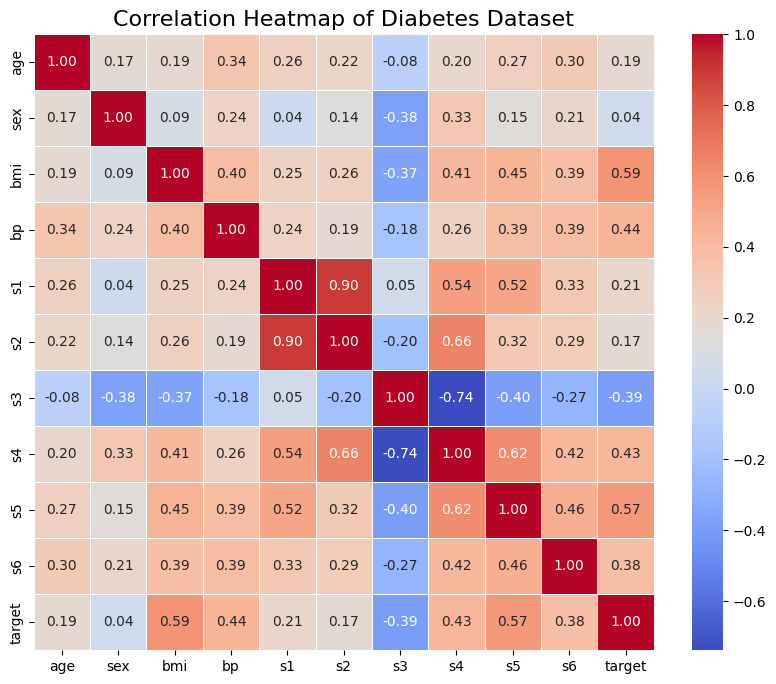

In [ ]:
correlation_with_target = diabetes_df.corr()
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap of Diabetes Dataset', fontsize=16)

# Display the heatmap
plt.show()

Масштабувати ознаки.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
diabetes_sklearn = load_diabetes()
diabetes_df = pd.DataFrame(data=diabetes_sklearn.data, columns=diabetes_sklearn.feature_names)
scaler = MinMaxScaler()
diabetes_scaled = scaler.fit_transform(diabetes_df)

# Перетворення назад до DataFrame для зручного перегляду
diabetes_scaled_df = pd.DataFrame(diabetes_scaled, columns=diabetes_sklearn.feature_names)

# Відображення перших кількох рядків
print(diabetes_scaled_df.head())

        age  sex       bmi        bp        s1        s2        s3        s4  \
0  0.666667  1.0  0.582645  0.549296  0.294118  0.256972  0.207792  0.282087   
1  0.483333  0.0  0.148760  0.352113  0.421569  0.306773  0.623377  0.141044   
2  0.883333  1.0  0.516529  0.436620  0.289216  0.258964  0.246753  0.282087   
3  0.083333  0.0  0.301653  0.309859  0.495098  0.447211  0.233766  0.423131   
4  0.516667  0.0  0.206612  0.549296  0.465686  0.417331  0.389610  0.282087   

         s5        s6  
0  0.562217  0.439394  
1  0.222437  0.166667  
2  0.496578  0.409091  
3  0.572923  0.469697  
4  0.362385  0.333333  


8. Поділити дані на тренувальну і тестову вибірки.

In [ ]:
from sklearn.model_selection import train_test_split
diabetes_df['target'] = diabetes_sklearn.target
X = diabetes_df.drop('target', axis=1)
y = diabetes_df['target']

# Поділ даних на тренувальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Виведення розмірів вибірок
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 353 samples
Test set size: 89 samples


In [ ]:
diabetes_df['target'] = diabetes_sklearn.target

# Розрахунок кореляції
correlation_with_target = diabetes_df.corr()['target'].drop('target')

# Сортування кореляцій у порядку спадання
correlation_sorted = correlation_with_target.sort_values(ascending=False)

# Вибір найбільш корельованих ознак
top_features = correlation_sorted.index[:5]  # Наприклад, вибираємо 5 найбільш корельованих ознак
print("Top features:", top_features)

Top features: Index(['bmi', 's5', 'bp', 's4', 's6'], dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Лінійна регресія
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)

print("Mean Squared Error (Linear Regression):", mse_linear)

# RandomForest регресія
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Mean Squared Error (Random Forest Regression):", mse_rf)

Mean Squared Error (Linear Regression): 2900.193628493482
Mean Squared Error (Random Forest Regression): 2952.0105887640448


In [ ]:

comparison_df = pd.DataFrame({
    'True Values': y_test,
    'Predicted Values (Linear Regression)': y_pred_linear,
    'Predicted Values (RandomForest)': y_pred_rf
})

print(comparison_df.head(10))

     True Values  Predicted Values (Linear Regression)  \
287        219.0                            139.547558   
211         70.0                            179.517208   
72         202.0                            134.038756   
321        230.0                            291.417029   
73         111.0                            123.789659   
418         84.0                             92.172347   
367        242.0                            258.232389   
354        272.0                            181.337321   
281         94.0                             90.224113   
148         96.0                            108.633759   

     Predicted Values (RandomForest)  
287                           144.00  
211                           171.58  
72                            150.72  
321                           253.71  
73                            107.19  
418                           123.54  
367                           239.09  
354                           219.01  
281       

Завдання 2.
Завантажити датасет California Housing Dataset, що містить інформацію про житло в Каліфорнії. Вивести перших 5 рядків.

In [ ]:

from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
print(california_housing.frame.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [ ]:
print(california_housing.frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [ ]:
print(california_housing.frame.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


Масштабувати ознаки.

In [ ]:

from sklearn.preprocessing import StandardScaler

# Масштабування ознак
scaler = StandardScaler()
scaled_features = scaler.fit_transform(california_housing.data)

# Створюємо новий DataFrame зі масштабованими ознаками
scaled_df = pd.DataFrame(scaled_features, columns=california_housing.feature_names)

Поділити дані на тренувальні і тестові.

In [ ]:
from sklearn.model_selection import train_test_split

# Поділ даних
X_train, X_test, y_train, y_test = train_test_split(scaled_df, california_housing.target, test_size=0.2, random_state=42)


In [ ]:

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Моделі
lr = LinearRegression()
ridge = Ridge()
rf = RandomForestRegressor()

# Параметри для підбору
ridge_params = {'alpha': [0.1, 1, 10, 100]}
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

# GridSearch для Ridge
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)

# GridSearch для RandomForest
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='r2')
rf_grid.fit(X_train, y_train)

# Навчання лінійної регресії
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:

from sklearn.metrics import r2_score, mean_squared_error

# Прогнозування
y_pred_lr = lr.predict(X_test)
y_pred_ridge = ridge_grid.predict(X_test)
y_pred_rf = rf_grid.predict(X_test)

# Виведення R² і MSE
print(f"Linear Regression: R²={r2_score(y_test, y_pred_lr):.2f}, MSE={mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"Ridge Regression: R²={r2_score(y_test, y_pred_ridge):.2f}, MSE={mean_squared_error(y_test, y_pred_ridge):.2f}")
print(f"Random Forest: R²={r2_score(y_test, y_pred_rf):.2f}, MSE={mean_squared_error(y_test, y_pred_rf):.2f}")

Linear Regression: R²=0.58, MSE=0.56
Ridge Regression: R²=0.58, MSE=0.56
Random Forest: R²=0.81, MSE=0.25


Вивести справжні і прогнозовані значення.

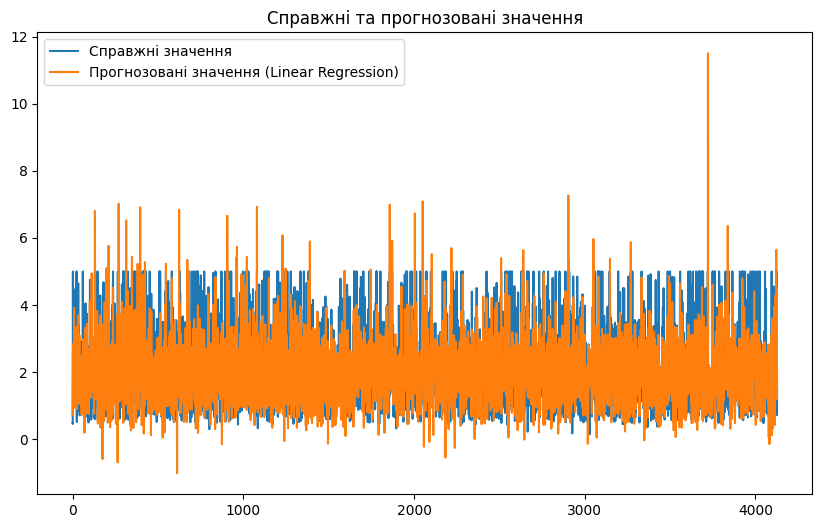

In [ ]:

# Побудова графіку порівняння справжніх і прогнозованих значень для однієї з моделей
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Справжні значення")
plt.plot(y_pred_lr, label="Прогнозовані значення (Linear Regression)")
plt.legend()
plt.title('Справжні та прогнозовані значення')
plt.show()